# Bootcamp Neuron 2020

\\

**Autor**: Felipe Maia Polo  

**Bio**: Bacharel em ciências econômicas pela FEARP/USP e mestrando em estatística pelo IME/USP.  É um dos fundadores do Neuron/DSAI e atualmente atua como consultor em ciência de dados e Research Assistant no Advanced Institute of Artificial Intelligence (AI2). Tem interesse pelas áreas de aprendizado de máquina probabilístico, inferência Bayesiana e métodos estatísticos para dados superdimensionados.

**Linkedin**: https://www.linkedin.com/in/felipemaiapolo/

**E-mail**: felipemaiapolo@gmail.com

\\

# Introdução à Classificação em Machine Learning



Abrindo pacotes que utilizaremos hoje:



In [ ]:
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML 

## O modelo de Regressão Logística

Vamos observer a função Sigmoid:

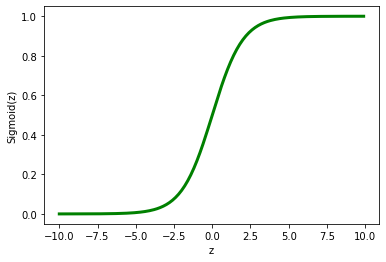

In [ ]:
def sigmoid(z): return 1/(1+np.exp(-z))

x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x), 'g', lw=3)
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')

plt.show()

### Exemplo 1

Neste exemplo criaremos um modelo um pouco mais complexo incluindo o que chamamos de intercepto ou bias.

Gerando dados:

In [ ]:
random.seed(0)

n=500

mean_0 = 1
mean_1 = 4
scale = 1

X = np.hstack((np.random.normal(mean_0, scale, n), np.random.normal(mean_1, scale, n)))
y = np.hstack((np.zeros(n), np.ones(n)))

print(np.shape(X), np.shape(y))

(1000,) (1000,)


Vamos dividir os dados nos conjuntos de treino e de teste:

**Atenção: toda a modelagem é feita no conjunto de treino e o conjunto de teste só é utilizado para a avaliação final do modelo!!!**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Neste exemplo só temos uma variável como atributo e nosso rótulo é binário. Vamos visualizar os dados de treino:

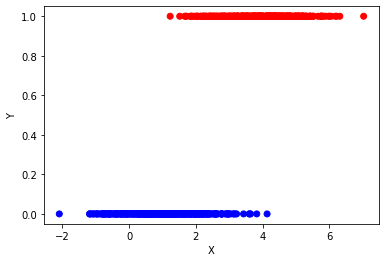

In [ ]:
plt.scatter(X_train,y_train,c=y_train,cmap='bwr')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Neste problema nosso primeiro modelo para a probabilidade condicional do rótulo 1 é da seguinte cara:

\begin{align}
  \mathbb{P}(Y=1|X=x)=\frac{1}{1+e^{-(w \cdot x)}}=\sigma(w \cdot x)
\end{align}

Dado isso, "treinar" o modelo ou o algoritmo se consiste no aprendizado dos melhores valores de $w$ para o nosso caso. Para isso definimos uma função de **ERRO** que deve ser minimizada. Neste caso a função é chamada de Log Loss. Vamos codar a função erro:

In [ ]:
def logloss(b,w,X=X_train,y=y_train):
    out=0
    for i in range(np.shape(X)[0]):
        eps=10**-50
        out += -(y[i]*np.log(sigmoid(b+w*X[i])+eps) + (1-y[i])*np.log(1-sigmoid(b+w*X[i])+eps))
    return(out/y.shape[0])

Agora vamos visualizar a função de erro assumindo $b=0$:

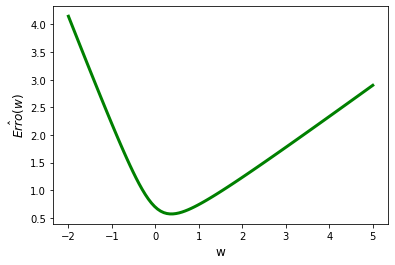

In [ ]:
w = np.linspace(-2, 5, 100)

loss=[logloss(0,ww) for ww in w]

plt.plot(w,loss, 'g', lw=3)
plt.xlabel('w', fontsize=12)
plt.ylabel('$\hat{Erro}(w)$', fontsize=12)
plt.show()

Agora utilizaremos a biblioteca Scikit-Learn para fazer a máquina aprender o melhor valor para $w$:

In [ ]:
#O pacote somente X como um array de 2 dimensões... vamos dar um reshape
X_train=X_train.reshape((-1,1)) 

#Treinando modelo
logreg = LogisticRegression(penalty='none', solver='newton-cg', fit_intercept=False)
logreg = logreg.fit(X_train, y_train)

In [ ]:
w=logreg.coef_[0][0]

w, logloss(0,w)

(0.36719042326362666, 0.5710459516841064)

Agora vamos plotar nosso modelo aprendido nos dados de treino:

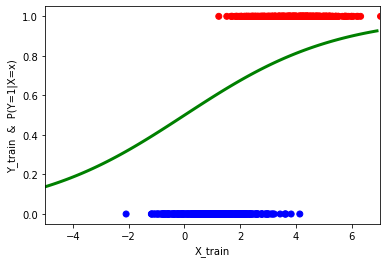

In [ ]:
x = np.arange(-5, 7, 0.1)
plt.plot(x, sigmoid(w*x), 'g', lw=3)

plt.scatter(X_train,y_train,c=y_train,cmap='bwr')
plt.xlim((-5,7))
plt.xlabel('X_train')
plt.ylabel('Y_train  &  P(Y=1|X=x)')

plt.show()

Vamos plotar nosso modelo contra os dados de teste

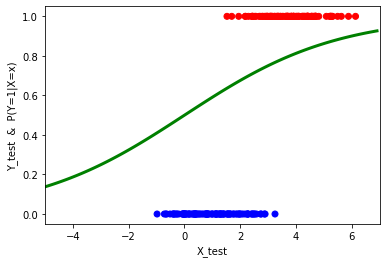

In [ ]:
x = np.arange(-5, 7, 0.1)
plt.plot(x, sigmoid(w*x), 'g', lw=3)

plt.scatter(X_test,y_test,c=y_test,cmap='bwr')
plt.xlim((-5,7))
plt.xlabel('X_test')
plt.ylabel('Y_test  &  P(Y=1|X=x)')

plt.show()

Avaliando função de Erro no conjunto de teste para o valor ótimo de $w$:

In [ ]:
logloss(0,w,X=X_test,y=y_test)

0.5689856830354519

Neste problema nosso modelo para a probabilidade condicional do rótulo 1 é da seguinte cara:

\begin{align}
  \mathbb{P}(Y=1|X=x)=\frac{1}{1+e^{-(b+w \cdot x)}}=\sigma(b+w \cdot x)
\end{align}

Dado isso, "treinar" o modelo ou o algoritmo se consiste no aprendizado dos melhores valores de $b$ e de $w$ para o nosso caso.

Vamos visualizar as curvas de nível da função Erro:

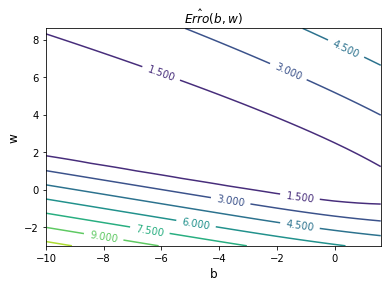

In [ ]:
delta = 0.4

m1 = np.arange(-10, 2, delta)
m2 = np.arange(-3, 9, delta)
M1, M2 = np.meshgrid(m1, m2)

Z=np.zeros(np.shape(M1))

for i in range(np.shape(m1)[0]):
    for j in range(np.shape(m2)[0]):
        Z[i,j] = logloss(M1[i,j], M2[i,j])

plt.figure()
CS = plt.contour(M1, M2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('b', fontsize=12)
plt.ylabel('w', fontsize=12)
plt.title('$\hat{Erro}(b,w)$', fontsize=12) 
plt.show()

Agora utilizaremos a biblioteca Scikit-Learn para fazer a máquina aprender os melhores valores para $b$ e $w$:

In [ ]:
#O pacote somente X como um array de 2 dimensões... vamos dar um reshape
X_train=X_train.reshape((-1,1)) 

#Treinando modelo
logreg = LogisticRegression(penalty='none', solver='newton-cg')
logreg = logreg.fit(X_train, y_train)

Recuperando os pesos aprendidos:

In [ ]:
b=logreg.intercept_[0]
w=logreg.coef_[0][0]

b, w, logloss(b,w)

(-6.831349865882596, 2.694196143161914, 0.19380099858131355)

Agora vamos plotar nossa modelo aprendido nos dados de treino:

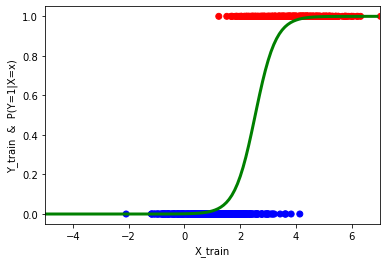

In [ ]:
x = np.arange(-5, 7, 0.1)
plt.plot(x, sigmoid(b+w*x), 'g', lw=3)

plt.scatter(X_train,y_train,c=y_train,cmap='bwr')
plt.xlim((-5,7))
plt.xlabel('X_train')
plt.ylabel('Y_train  &  P(Y=1|X=x)')

plt.show()

Vamos visualizar como nosso modelo generalizaria para o conjunto de teste:

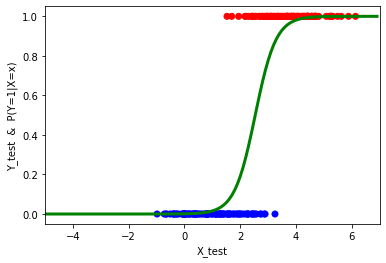

In [ ]:
x = np.arange(-5, 7, 0.1)
plt.plot(x, sigmoid(b+w*x), 'g', lw=3)

plt.scatter(X_test,y_test,c=y_test,cmap='bwr')
plt.xlim((-5,7))
plt.xlabel('X_test')
plt.ylabel('Y_test  &  P(Y=1|X=x)')

plt.show()

Avaliando função de Erro no conjunto de teste para os valores ótimos de $w$ e $b$:

In [ ]:
logloss(b,w,X=X_test,y=y_test)

0.18579155114784765

### Exemplo 2: Aplicações com dados reais

Carregando o dataset:

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

Dividindo treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=27)

Treinando regresão logística:

In [ ]:
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Veja que tivemos problemas de convergência. Para evitar esse tipo de problema, podemos recorrer à padronização das variáveis, afim de deixar tudo na mesma escala. Para padronizar fazemos a seguinte atualização:

\begin{align}
    x_i \leftarrow \frac{x_i-\text{avg}(x)}{\text{std}(x)}
\end{align}

A média e o dp são calculado no conjunto de treino. Padronizando:

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

Treinando novamente

In [ ]:
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X_train, y_train)

Vendo pesos estimados

In [ ]:
logreg.intercept_[0]

3.9271493056002247

In [ ]:
logreg.coef_[0]

array([  0.96740833,  -6.46780108,   2.22705071,  -1.77365438,
         4.42830437,  12.99517129, -12.69411298, -15.98914508,
        -1.71851571,   6.06473186, -13.31185709,   4.48022786,
         3.79454978, -10.70340159,   5.55440992,   8.27948246,
        -6.622762  ,   3.61202902,  -4.44438348,  11.50613653,
       -16.29181446, -14.1266622 ,  -4.99972378, -16.27849931,
        -3.23356537,  10.00394837, -14.48735182, -16.64793569,
       -14.11988774,  -5.14136451])

Prevendo probabilidades para conjunto de teste:

In [ ]:
X_test=scaler.transform(X_test)

y_prob = logreg.predict_proba(X_test)

y_prob.shape

(285, 2)

Na segunda coluna estão as probabilidades da classe 1:

In [ ]:
y_prob=y_prob[:,1]

np.round(y_prob,5)[:20]

array([0.05041, 0.     , 1.     , 1.     , 0.     , 1.     , 0.     ,
       1.     , 0.     , 0.99994, 1.     , 0.     , 1.     , 1.     ,
       0.     , 1.     , 0.     , 1.     , 0.     , 1.     ])

Calculando o erro no teste

In [ ]:
log_loss(y_test,y_prob)

0.8703292239306463

### Exemplo 3: Regularização

Arrumando as coisas :)

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, stratify=y, random_state=27)

Escolhendo melhor hiperparâmetro

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1',solver='liblinear'))])
parameters = {'logreg__C': np.linspace(10**-5,10,100)}
 
gcv=GridSearchCV(pipe, parameters, cv=3, scoring='neg_log_loss', n_jobs=-1)
gcv.fit(X_train, y_train)

#Vendo o melhor valor e o escore associado
c=gcv.best_params_['logreg__C']

c, gcv.best_score_

(4.343439999999999, -0.04770473962844424)

Treinando e predizendo

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LogisticRegression(penalty='l1', C=c, solver='liblinear'))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=4.343439999999999, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l1',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

Vendo pesos estimados:

In [ ]:
pipe['logreg'].intercept_[0]

0.04932041993824579

In [ ]:
pipe['logreg'].coef_[0]

array([ 0.        , -1.50765925,  0.        ,  0.        ,  0.        ,
        1.79712694, -3.45430409,  0.        ,  0.        ,  0.10720845,
       -2.09179799,  0.        ,  0.        ,  0.        ,  0.        ,
        0.79492314,  0.        ,  0.        ,  0.        ,  1.69646058,
       -0.88762373, -1.21618743,  0.        , -7.43921182,  0.        ,
        0.02222314, -0.8639796 , -3.3935842 , -1.98518113,  0.        ])

In [ ]:
np.mean(pipe['logreg'].coef_[0]!=0)

0.4666666666666667

Predizendo

In [ ]:
y_prob = pipe.predict_proba(X_test)
y_prob = y_prob[:,1]

Verificando erro no teste

In [ ]:
log_loss(y_test,y_prob)

0.15030173529420715

## Classificação e Métricas de Avaliação

### Exemplo 4

Gerando dados quando temos 2 atributos:

In [ ]:
n=500

mean_0 = [0, 0]
cov_0 = [[1, 0], [0, 1]]

mean_1 = [2, 2]
cov_1 = [[1, 0], [0, 1]]

X = np.vstack((np.random.multivariate_normal(mean_0, cov_0, n), np.random.multivariate_normal(mean_1, cov_1, n)))
y = np.hstack((np.zeros(n), np.ones(n)))

np.shape(X), np.shape(y)

((1000, 2), (1000,))

Divindo conjuntos de treino e teste:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Visualizando dados de treino:

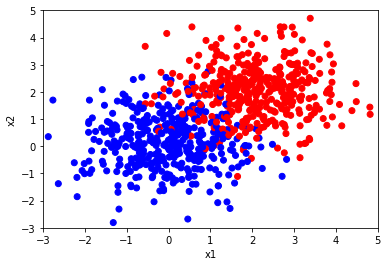

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='bwr')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.show()

Neste problema nosso modelo para a probabilidade condicional do rótulo 1 é da seguinte cara:

\begin{align}
  \mathbb{P}(Y=1|X_1=x_1,X_2=x_2)=\frac{1}{1+e^{-(b+w_1 \cdot x_1 +w_2 \cdot x_2)}}=\sigma(b+w_1 \cdot x_1 +w_2 \cdot x_2)
\end{align}


Treinando modelo de regressão logística no conjunto de treinamento:

In [ ]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

Recuperando pesos aprendidos:

In [ ]:
b=logreg.intercept_[0]
w1=logreg.coef_[0][0]
w2=logreg.coef_[0][1]

b, w1, w2

(-4.457724008699683, 2.1541048297645706, 2.1303998111630413)

Visualizado o modelo aprendido juntamente com os dados de treino:

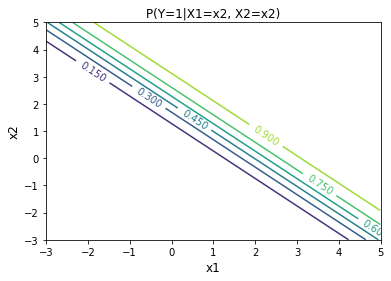

In [ ]:
delta = 0.01

m1 = np.arange(-3, 5, delta)
m2 = np.arange(-3, 5, delta)
M1, M2 = np.meshgrid(m1, m2)

Z=np.zeros(np.shape(M1))

for i in range(np.shape(m1)[0]):
    for j in range(np.shape(m2)[0]):
        Z[i,j] = sigmoid(b+w1*M1[i,j]+w2*M2[i,j])

plt.figure()
CS = plt.contour(M1, M2, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('P(Y=1|X1=x2, X2=x2)', fontsize=12)
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.show()

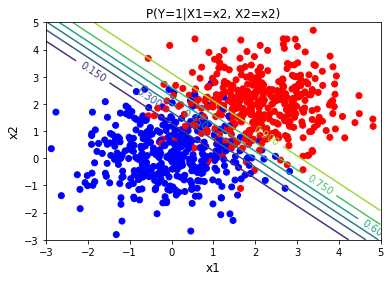

In [ ]:
plt.figure()
CS = plt.contour(M1, M2, Z)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='bwr')
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('P(Y=1|X1=x2, X2=x2)', fontsize=12)
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.show()

A partir das probabilidades preditas, vamos classificar as amostras como 0 ou 1:

In [ ]:
y_prob = logreg.predict_proba(X_test)
y_prob = y_prob[:,1]

In [ ]:
cut=.1

y_pred=1*(y_prob>cut)

In [ ]:
y_pred[:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

Obs: Utilizar o ponto de corte igual a 1/2 é igual a utilizar o método "predict" da regressão logística:

In [ ]:
y_pred2=logreg.predict(X_test)

np.mean(y_pred==y_pred2)

1.0

Podemos então checar a acurácia do modelo (% de acerto):

In [ ]:
np.mean(y_test==y_pred)

0.92

A acurácia pode ser uma métrica relevante, mas não é a única e na prática é raro utilizarmos somente ela. 

A matriz de confusão nos traz mais informações relevantes:

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)

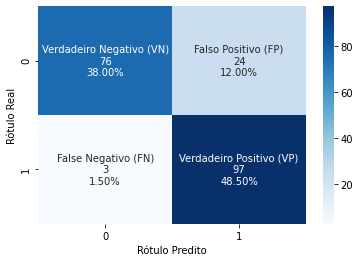

In [ ]:
group_names = ['Verdadeiro Negativo (VN)','Falso Positivo (FP)','False Negativo (FN)','Verdadeiro Positivo (VP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Rótulo Predito")
plt.ylabel("Rótulo Real")
plt.show()

Na figura acima, por exemplo, VN é o número de exemplos negativos (ou 0) e que foram de fato classificados como negativos - por isso Verdadeiros Negativos! Já FN é o número de exemplos que são positivos mas que foram classificados erroneamente como negativos - por isso Falsos Negativos! Analogamente, também temos os FPs e os VPs. A Acurácia, então, poderia ser definida como:

\\

\begin{align}
  \text{Acurácia}=\frac{VN+VP}{VN+VP+FN+FP}
\end{align}

\\

A fórmula acima pega o número de casos em que acertamos a divide pelo número total de casos, que é algo que já havíamos comentado. Uma outra importante métrica é a Precisão que é definida pela seguinte fórmula:

\\

\begin{equation}
\text{Precisão}=\frac{VP}{VP+FP}
\end{equation}

\\

O que a fórmula da Precisão quer nos dizer? Ela nos dá o percentual de acertos quando predizemos a classe positiva (ou 1). Ou seja, se classificamos 100 indivíduos como positivos em nossa amostra, mas destes 100 só 80 são realmente positivos, nossa Precisão seria de $0,8=80\%$. Uma outra importante métrica, que complementa bem a informação trazida pela Precisão, é o *Recall* (ou Sensitividade), que é dado pela seguinte fórmula:

\\

\begin{equation}
\text{Recall}=\frac{VP}{VP+FN}
\end{equation} 

\\

O que a fórmula de *Recall* quer nos dizer? Ela nos dá o percentual de indivíduos da classe positiva que estão na nossa amostra e que conseguimos prever. Ou seja, se há 100 indivíduos positivos em nossa amostra, mas destes 100 só classificamos 70 como sendo positivos, nosso Recall seria de $0,7=70\%$. É importante dizer que existem métricas análogas à Precisão e ao Recall para os exemplos negativos (e.g. o 'Recall' para os exemplos negativos é chamado de **Especificidade**). A última métrica que apresentaremos aqui é o Escore F1, que é a média harmônica entre Recall e Precisão:

\\

\begin{equation}
\text{F1}=2 \cdot \frac{\text{Recall} \cdot \text{Precisão}}{\text{Recall} + \text{Precisão}}
\end{equation} 

\\


Definido um ponto de corte, podemos avaliar todas as métricas aqui apresentadas de uma só vez:

In [ ]:
report=classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85       100
         1.0       0.80      0.97      0.88       100

    accuracy                           0.86       200
   macro avg       0.88      0.86      0.86       200
weighted avg       0.88      0.86      0.86       200



Na tabela acima temos um resumo bem legal de como nosso classificador performou no conjunto de teste. A coluna '**support**' nos dá o número de indivíduos na classe 0, classe 1 e total. As linha '**macro avg**' nos dá uma média simples das métricas Precisão, Recall e Escore F1 nas duas classes e a linha '**weighted avg**' nos dá a média ponderada das métricas Precisão, Recall e Escore F1 nas duas classes. É importante dizer que quando temos um base de dados desbalanceada, i.e. o número de exemplos positivos e negativos difere muito, mas mesmo assim queremos dar o mesmo peso para as duas classes na hora da avaliação, olhamos para as médias simples. 